#KNN (K-Nearest Neighbors)

KNN es un algoritmo de aprendizaje automático supervisado que se utiliza para tareas de clasificación y regresión. Funciona buscando los K vecinos más cercanos a un punto de datos determinado en función de una métrica de distancia como la distancia euclidiana. El algoritmo asigna el punto de datos a la clase que es más común entre sus K vecinos más cercanos.

In [1]:
# Instalar librerías necesarias (Solo ejecutar si no están instaladas)
from IPython.utils import io
import tqdm.notebook

total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
        # Instalar rdkit
        !pip -q install rdkit.pypi==2021.9.4
        pbar.update(20)
        # Instalar Pillow
        !pip -q install Pillow
        pbar.update(40)
        # Instalar molplotly
        !pip install molplotly
        pbar.update(60)
        # Instalar jupyter-dash
        !pip install jupyter-dash
        pbar.update(80)
        # Instalar el diseño de aplicación dash
        !pip install dash-bootstrap-components
        pbar.update(100)


  0%|          | 0/100 [00:00<?, ?it/s]

In [2]:
# Importar librerías
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
# Leer bases de datos
datos = "/content/drive/MyDrive/INGER/ETAPA 2024/Version Final/0. Data Set/Concatenadas.csv"
datos = pd.read_csv(datos)

In [4]:
datos

,Name,Total Molweight,Monoisotopic Mass,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Relative PSA,Polar Surface Area,...,Amides,Amines,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,Geroprotectors,DataSet,Smile
0,"(R,R)-Cis-Diethyl Tetrahydro-2,8-Chrysenediol",320.431,320.177630,4.8318,-4.116,2,2,246.20,0.106420,40.46,...,0,0,0,0,0,0,0,1,Geroprotectors,CC[C@@H]1CC2=C(C=CC(=C2)O)C3=C1C4=C(C[C@H]3CC)...
1,"1,2,3,4,6-Penta-O-Galloyl-B-D-Glucose",940.679,940.118190,1.8357,-3.209,26,15,619.06,0.519660,444.18,...,0,0,0,0,0,0,0,1,Geroprotectors,Oc1cc(cc(O)c1O)C(=O)OC[C@H]1O[C@@H](OC(=O)c2cc...
2,10-Hydroxy-2-Decenoic Acid,186.250,186.125595,2.1572,-1.884,3,2,166.77,0.235290,57.53,...,0,0,0,0,0,0,1,1,Geroprotectors,C(CCC/C=C/C(=O)O)CCCO
3,1400W,177.250,177.126597,-0.1475,-1.874,3,2,153.05,0.274750,64.40,...,0,1,1,0,0,2,0,1,Geroprotectors,CC(=NCC1=CC=CC(=C1)CN)N
4,17-A-Estradiol,272.387,272.177630,3.8766,-4.020,2,2,200.69,0.130550,40.46,...,0,0,0,0,0,0,0,1,Geroprotectors,[H][C@]12CC[C@]3(C)[C@H](O)CC[C@@]3([H])[C@]1(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Tolcapone,273.243,273.063724,1.5205,-3.928,6,2,199.40,0.349350,103.35,...,0,0,0,0,0,0,0,0,NoGeroprotectors,CC1=CC=C(C=C1)C(=O)C2=CC(=C(C(=C2)O)O)[N+](=O)...
401,Acridine Orange,265.359,265.157897,3.0853,-3.895,3,0,210.86,0.085697,19.37,...,0,2,0,2,1,0,0,0,NoGeroprotectors,CN(C)C1=CC2=C(C=C1)C=C3C=CC(=CC3=N2)N(C)C
402,Aflatoxins,312.276,312.063390,1.6346,-3.266,6,0,208.96,0.316230,71.06,...,0,0,0,0,0,0,0,0,NoGeroprotectors,COC1=C2C3=C(C(=O)CC3)C(=O)OC2=C4C5C=COC5OC4=C1
403,Diethylstilbestrol,268.355,268.146330,4.5248,-3.158,2,2,220.68,0.118720,40.46,...,0,0,0,0,0,0,0,0,NoGeroprotectors,CCC(=C(CC)C1=CC=C(C=C1)O)C2=CC=C(C=C2)O


In [ ]:
# Seleccionar las columnas de interés y dividir los datos en caracteristicas
columnas_interes = [1, 3, 5, 6, 7, 8, 20]
X = datos.iloc[:, columnas_interes]
y = datos.iloc[:, 44]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Calcular la precisión para diferentes valores de K
k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))


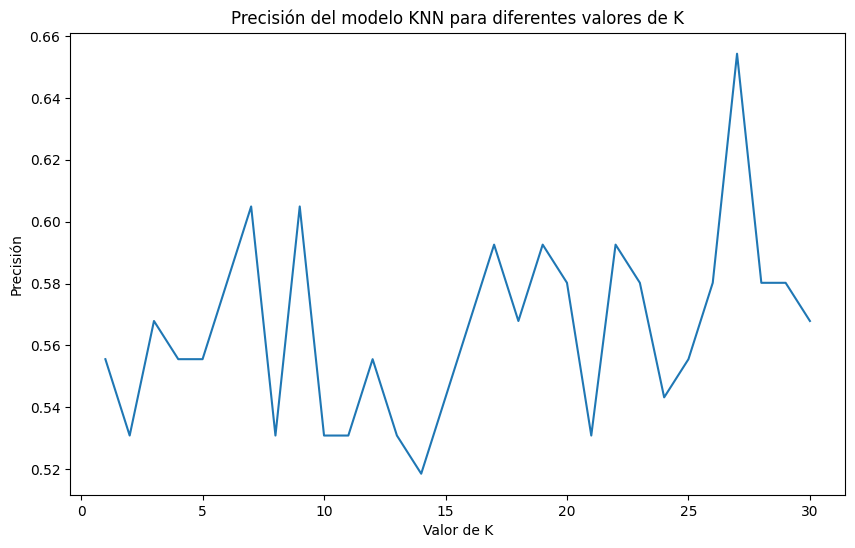

In [ ]:
# Graficar la precisión vs K
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores)
plt.xlabel('Valor de K')
plt.ylabel('Precisión')
plt.title('Precisión del modelo KNN para diferentes valores de K')
plt.show()


In [ ]:
# Encontrar el K óptimo
k_optimo = k_range[scores.index(max(scores))]
print(f"El valor óptimo de K es: {k_optimo}")

El valor óptimo de K es: 27


In [ ]:
# Crear y entrenar el modelo KNN con el K óptimo
knn_optimo = KNeighborsClassifier(n_neighbors=k_optimo)
knn_optimo.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=27)

In [ ]:
# Hacer predicciones
y_pred = knn_optimo.predict(X_test_scaled)


In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

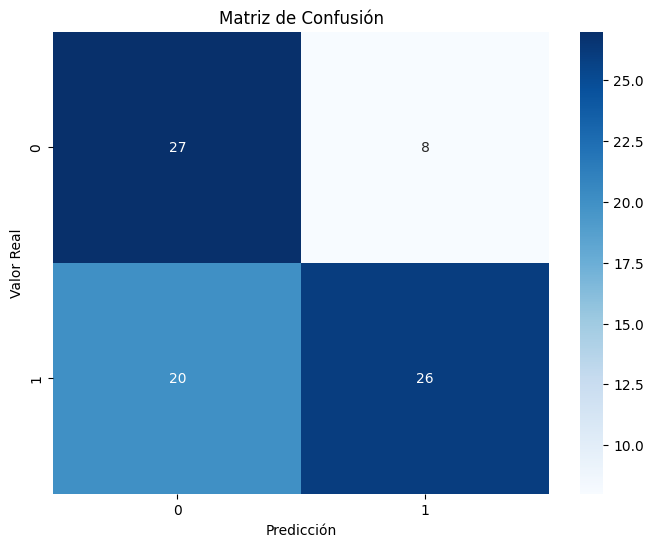

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

In [ ]:
# Calcular accuracy y especificidad
accuracy = accuracy_score(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
especificidad = tn / (tn + fp)

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Especificidad: {especificidad:.4f}")

Accuracy: 0.6543
Especificidad: 0.7714


In [ ]:
# Realizar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

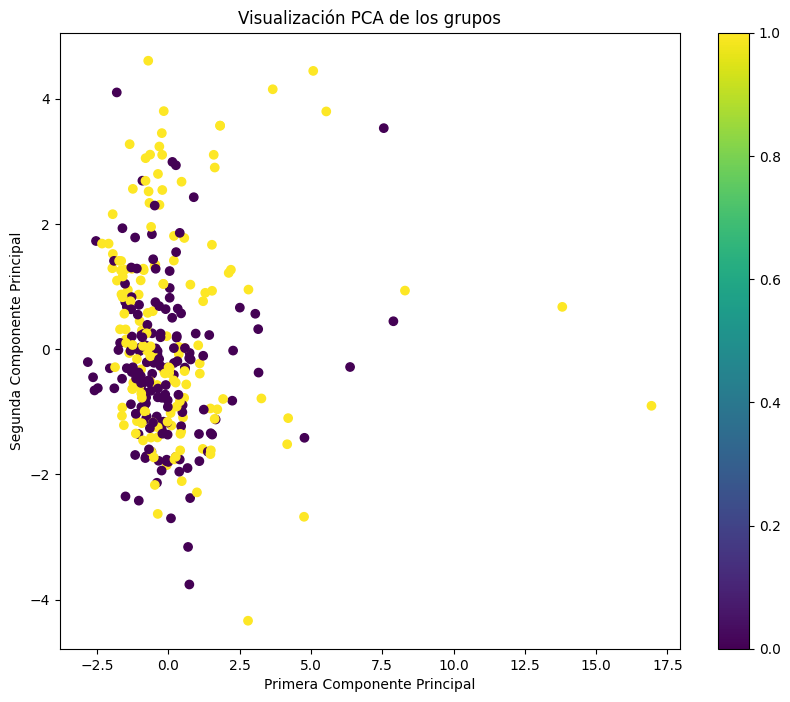

In [ ]:
# Graficar los resultados del PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar(scatter)
plt.title('Visualización PCA de los grupos')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.show()

In [ ]:
datos['Predicciones'] = knn_optimo.predict(scaler.transform(X))


In [ ]:
datos

,Name,Total Molweight,Monoisotopic Mass,cLogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,Relative PSA,Polar Surface Area,...,Amines,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,Geroprotectors,DataSet,Smile,Predicciones
0,"(R,R)-Cis-Diethyl Tetrahydro-2,8-Chrysenediol",320.431,320.177630,4.8318,-4.116,2,2,246.20,0.106420,40.46,...,0,0,0,0,0,0,1,Geroprotectors,CC[C@@H]1CC2=C(C=CC(=C2)O)C3=C1C4=C(C[C@H]3CC)...,1
1,"1,2,3,4,6-Penta-O-Galloyl-B-D-Glucose",940.679,940.118190,1.8357,-3.209,26,15,619.06,0.519660,444.18,...,0,0,0,0,0,0,1,Geroprotectors,Oc1cc(cc(O)c1O)C(=O)OC[C@H]1O[C@@H](OC(=O)c2cc...,1
2,10-Hydroxy-2-Decenoic Acid,186.250,186.125595,2.1572,-1.884,3,2,166.77,0.235290,57.53,...,0,0,0,0,0,1,1,Geroprotectors,C(CCC/C=C/C(=O)O)CCCO,0
3,1400W,177.250,177.126597,-0.1475,-1.874,3,2,153.05,0.274750,64.40,...,1,1,0,0,2,0,1,Geroprotectors,CC(=NCC1=CC=CC(=C1)CN)N,0
4,17-A-Estradiol,272.387,272.177630,3.8766,-4.020,2,2,200.69,0.130550,40.46,...,0,0,0,0,0,0,1,Geroprotectors,[H][C@]12CC[C@]3(C)[C@H](O)CC[C@@]3([H])[C@]1(...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,Tolcapone,273.243,273.063724,1.5205,-3.928,6,2,199.40,0.349350,103.35,...,0,0,0,0,0,0,0,NoGeroprotectors,CC1=CC=C(C=C1)C(=O)C2=CC(=C(C(=C2)O)O)[N+](=O)...,0
401,Acridine Orange,265.359,265.157897,3.0853,-3.895,3,0,210.86,0.085697,19.37,...,2,0,2,1,0,0,0,NoGeroprotectors,CN(C)C1=CC2=C(C=C1)C=C3C=CC(=CC3=N2)N(C)C,0
402,Aflatoxins,312.276,312.063390,1.6346,-3.266,6,0,208.96,0.316230,71.06,...,0,0,0,0,0,0,0,NoGeroprotectors,COC1=C2C3=C(C(=O)CC3)C(=O)OC2=C4C5C=COC5OC4=C1,0
403,Diethylstilbestrol,268.355,268.146330,4.5248,-3.158,2,2,220.68,0.118720,40.46,...,0,0,0,0,0,0,0,NoGeroprotectors,CCC(=C(CC)C1=CC=C(C=C1)O)C2=CC=C(C=C2)O,0


In [ ]:
# Guardar los resultados
#datos.to_csv('resultados_KNN.csv', index=False)

In [ ]:
# Cargar la base de datos COCONUT
coconut_data = pd.read_csv("/content/drive/MyDrive/INGER/ETAPA 2024/DATA /COCONUT_DesMol.csv")

In [ ]:
coconut_data.dropna(inplace=True)

In [ ]:
# Preprocesar los datos de COCONUT con las columnas de interes
columnas_interes = [5, 8, 10, 11, 12, 13, 25]
X_new = coconut_data.iloc[:, columnas_interes]

In [ ]:
coconut_data_scaled = scaler.transform(X_new)

In [ ]:
# Hacer predicciones utilizando el modelo KNN entrenado
coconut_data['Predicciones'] = knn_optimo.predict(coconut_data_scaled)

In [ ]:
# Si también quieres las probabilidades de predicción (opcional)
coconut_data['Probabilidad'] = knn_optimo.predict_proba(coconut_data_scaled)[:, 1]


In [ ]:
# Ver las predicciones para la base de datos COCONUT
print(coconut_data['Predicciones'])


0         0
1         1
2         0
3         1
4         0
         ..
407216    1
407224    1
407226    0
407234    1
407239    0
Name: Predicciones, Length: 364550, dtype: int64


In [ ]:
# Analizar los resultados
# Por ejemplo, puedes contar cuántos compuestos se predicen como activos o inactivos
print(coconut_data['Predicciones'].value_counts())

Predicciones
0    239814
1    124736
Name: count, dtype: int64


In [ ]:
# Guardar el DataFrame con las predicciones
coconut_data.to_csv('coconut_knn_predicciones.csv', index=False)

In [ ]:
# Mostrar las primeras filas de los resultados
coconut_data.head()

,Structure [idcode],Molecule Name,coconut_id,SMILES,name,Total Molweight,Molweight,Monoisotopic Mass,cLogP,cLogS,...,Hetero-Aromatic Rings,Amides,Amines,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,Predicciones,Probabilidad
0,ffk@p@@HdEM\bbTTTtbrbtMNLEkw`qRuUUUUTsUP@Oxaq`...,Compound 1,CNP0000001,O=C1OC2C(C(=C)C)CC1C3(O)CC4OC54C(=O)OC[CH]253C,Picrotoxinin,308.329,308.329,308.125990,-0.1819,-2.231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.296296
1,ek_TOH@DEVNCGHlbekhTZY]SP@cHdhhmhhheLiddiEEEhc...,Compound 2,CNP0000002,O=C(O)C=1C(=O)C(O)(CC(=O)C1N)C2OC(COC(=O)C)C(O...,5-{6-[(acetyloxy)methyl]-3-hydroxy-4-[(5-hydro...,660.648,660.648,660.183643,-2.4498,-2.574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.555556
2,ecTpE@@@DIOLk`\VQ\bbTTTTTTRrbnvbTRtRRabwAfbPUQ...,Compound 3,CNP0000003,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C(OC)=CC=C(OC)C6C...,"20,30-dihydroxy-5,9,12,25-tetramethoxy-27-meth...",598.602,598.602,598.183900,4.1740,-7.354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.444444
3,ei_PI@@@DIOLk`\^\bbTTTTTTRrbnvbTRtRRLxLtRBjJZv...,Compound 4,CNP0000004,O=C1OC2C(O)C=CC3C4=C5C(=O)C=6C=CC=C(O)C6C(=O)C...,"9,20,30-trihydroxy-5,25-dimethoxy-27-methyl-22...",554.549,554.549,554.157685,3.9683,-7.022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.518519
4,enUPF@@@DMBod\bbTTRTTVRVbffbjRvfdT|lbRr^AZ`hJh...,Compound 5,CNP0000005,O=C(OC1CC(C)(CCOC(=O)C(C)(C)C)C2CC(C)(C)CC2C1O...,"5-(benzoyloxy)-7-{2-[(2,2-dimethylpropanoyl)ox...",534.690,534.690,534.298140,7.2444,-6.642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.370370


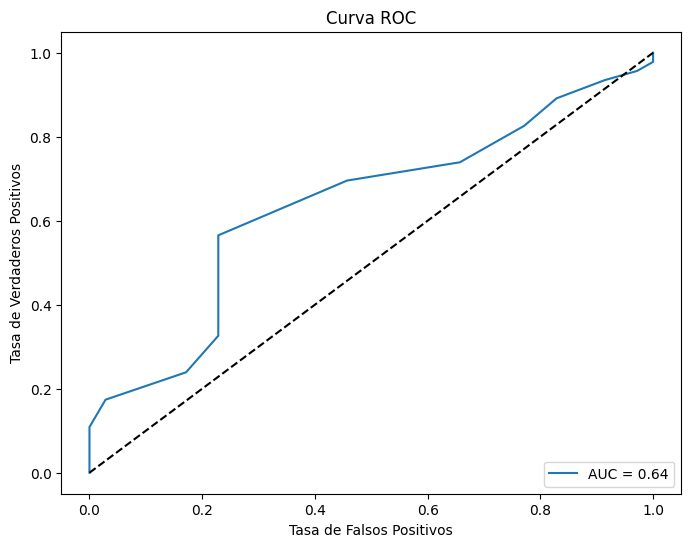

In [ ]:
# prompt:  curva ROC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de predicción
y_pred_proba = knn_optimo.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
